In [5]:
from datasets import load_dataset
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
import math

c:\Users\zerok\miniconda3\envs\EI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


https://huggingface.co/datasets/beenakurian/reddit_comments_subreddit_canada

In [6]:

datasetReddit = load_dataset("beenakurian/reddit_comments_subreddit_canada", split='train')

dfReddit = pd.DataFrame(datasetReddit)

dfReddit.rename(columns={'comment': 'text'}, inplace=True)

dfReddit

,text,sentiment
0,well there are thousands of international stud...,NEG
1,the article said dude needed a translator lol ...,NEG
2,for those convicted of crimes thats good,POS
3,good gotta bump up those rookie numbers,POS
4,good,POS
...,...,...
6903,i like you big fan,POS
6904,sounds like date night around here frowning fa...,POS
6905,apparently the answer was yes,NEU
6906,but with maaaaaassssksssss,NEU


https://huggingface.co/datasets/stanfordnlp/imdb

In [18]:
datasetImdb = load_dataset("stanfordnlp/imdb", split='train')

dfImdb = pd.DataFrame(datasetImdb)

dfImdb.rename(columns={'label': 'sentiment'}, inplace=True)

dfImdb['sentiment'] = dfImdb['sentiment'].replace({0: 'NEG', 1: 'POS'})

dfImdb

,text,sentiment
0,I rented I AM CURIOUS-YELLOW from my video sto...,NEG
1,"""I Am Curious: Yellow"" is a risible and preten...",NEG
2,If only to avoid making this type of film in t...,NEG
3,This film was probably inspired by Godard's Ma...,NEG
4,"Oh, brother...after hearing about this ridicul...",NEG
...,...,...
24995,A hit at the time but now better categorised a...,POS
24996,I love this movie like no other. Another time ...,POS
24997,This film and it's sequel Barry Mckenzie holds...,POS
24998,'The Adventures Of Barry McKenzie' started lif...,POS


In [48]:
df = pd.concat([dfReddit, dfImdb])

df.to_csv('../../data/raw/combined_data.csv', index=False)
df

,text,sentiment
0,well there are thousands of international stud...,NEG
1,the article said dude needed a translator lol ...,NEG
2,for those convicted of crimes thats good,POS
3,good gotta bump up those rookie numbers,POS
4,good,POS
...,...,...
24995,A hit at the time but now better categorised a...,POS
24996,I love this movie like no other. Another time ...,POS
24997,This film and it's sequel Barry Mckenzie holds...,POS
24998,'The Adventures Of Barry McKenzie' started lif...,POS


In [41]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [47]:
# save the train and test data in files
train_df.to_csv('../../data/clean/train.csv', index=False)
test_df.to_csv('../../data/clean/test.csv', index=False)

In [6]:
# load 3 csv files
train_df = pd.read_csv('../../data/clean/train.csv')
test_df = pd.read_csv('../../data/clean/test.csv')
df = pd.read_csv('../../data/raw/combined_data.csv')

In [24]:

def split_data_by_sentiment(data, sentiment):
    """
    Split the data DataFrame into separate lists based on sentiment.

    Parameters:
       data (DataFrame): The input DataFrame containing 'text' and 'sentiment' columns.
       sentiment (str): The sentiment label to filter the data.

    Returns:
        list: A list of text corresponding to the specified sentiment.
    """
    return data[data['sentiment'] == sentiment]['text'].tolist()

# Assuming df is your DataFrame containing 'text' and 'sentiment' columns
positive_data = split_data_by_sentiment(df, 'POS')
negative_data = split_data_by_sentiment(df, 'NEG')
neutral_data = split_data_by_sentiment(df, 'NEU')


In [10]:

def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove punctuation from the text using translation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)
    
    # Initialize a Porter stemmer for word stemming
    stemmer = PorterStemmer()
    
    # Get a set of English stopwords from NLTK
    stopwords_set = set(stopwords.words("english"))
    
    # Apply stemming to each token and filter out stopwords
    tokens = [stemmer.stem(token) for token in tokens if token not in stopwords_set]
    
    # Return the preprocessed tokens
    return tokens

def calculate_word_counts(textes):
    # Initialize a defaultdict to store word counts, defaulting to 0 for unseen words
    word_count = defaultdict(int)
    
    # Iterate through each text in the given list of textes
    for text in textes:
        # Tokenize and preprocess the text using the preprocess_text function
        tokens = preprocess_text(text)
        
        # Iterate through each token in the preprocessed tokens
        for token in tokens:
            # Increment the count for the current token in the word_count dictionary
            word_count[token] += 1
    
    # Return the word_count dictionary containing word frequencies
    return word_count

# Calculate word counts for textes with positive sentiment
word_count_positive = calculate_word_counts(train_df[train_df['sentiment'] == 'POS']['text'])

# Calculate word counts for textes with negative sentiment
word_count_negative = calculate_word_counts(train_df[train_df['sentiment'] == 'NEG']['text'])

# Calculate word counts for textes with neutral sentiment
word_count_neutral = calculate_word_counts(train_df[train_df['sentiment'] == 'NEU']['text'])

KeyboardInterrupt: 

In [39]:
# save word counts to a pickle
import pickle

with open('../../src/model2/word_count_positive.pkl', 'wb') as f:
    pickle.dump(word_count_positive, f)

with open('../../src/model2/word_count_negative.pkl', 'wb') as f:
    pickle.dump(word_count_negative, f)

with open('../../src/model2/word_count_neutral.pkl', 'wb') as f:
    pickle.dump(word_count_neutral, f)


In [11]:
# load word counts from a pickle
import pickle

with open('../../src/model2/word_count_positive.pkl', 'rb') as f:
    word_count_positive = pickle.load(f)

with open('../../src/model2/word_count_negative.pkl', 'rb') as f:
    word_count_negative = pickle.load(f)

with open('../../src/model2/word_count_neutral.pkl', 'rb') as f:
    word_count_neutral = pickle.load(f)

In [12]:
def calculate_likelihood(word_count, total_words, laplacian_smoothing=1):
    # Create an empty dictionary to store the likelihood values
    likelihood = {}
    
    # Get the number of unique words in the vocabulary
    vocabulary_size = len(word_count)

    # Iterate through each word and its corresponding count in the word_count dictionary
    for word, count in word_count.items():
        # Calculate the likelihood using Laplacian smoothing formula
        # Laplacian smoothing is used to handle unseen words in training data
        # The formula is (count + smoothing) / (total_words + smoothing * vocabulary_size)
        likelihood[word] = (count + laplacian_smoothing) / (total_words + laplacian_smoothing * vocabulary_size)

    # Return the calculated likelihood dictionary
    return likelihood

likelihood_positive = calculate_likelihood(word_count_positive, len(train_df[train_df['sentiment'] == 'POS']), 1)
likelihood_negative = calculate_likelihood(word_count_negative, len(train_df[train_df['sentiment'] == 'NEG']), 1)
likelihood_neutral = calculate_likelihood(word_count_neutral, len(train_df[train_df['sentiment'] == 'NEU']), 1)

In [13]:
def calculate_log_prior(sentiment, data):
    # Calculate the natural logarithm of the ratio of textes with the specified sentiment to the total number of textes
    log_prior = math.log(len(data[data['sentiment'] == sentiment]) / len(data))
    
    # Return the calculated log prior
    return log_prior

# Calculate the log prior for textes with positive sentiment
log_prior_positive = calculate_log_prior('POS', df)

# Calculate the log prior for textes with negative sentiment
log_prior_negative = calculate_log_prior('NEG', df)

# Calculate the log prior for textes with neutral sentiment
log_prior_neutral = calculate_log_prior('NEU', df)

In [14]:
# Create a dictionary of log-likelihood values for positive sentiment
log_likelihood_positive = {word: math.log(prob) for word, prob in likelihood_positive.items()}

# Create a dictionary of log-likelihood values for negative sentiment
log_likelihood_negative = {word: math.log(prob) for word, prob in likelihood_negative.items()}

# Create a dictionary of log-likelihood values for neutral sentiment
log_likelihood_neutral = {word: math.log(prob) for word, prob in likelihood_neutral.items()}

In [15]:
def classify_text_with_scores(text, log_likelihood_positive, log_likelihood_negative, log_likelihood_neutral,
                               log_prior_positive, log_prior_negative, log_prior_neutral):
    # Tokenize and preprocess the input text
    tokens = preprocess_text(text)

    # Calculate the log scores for each sentiment category
    log_score_positive = log_prior_positive + sum([log_likelihood_positive.get(token, 0) for token in tokens])
    log_score_negative = log_prior_negative + sum([log_likelihood_negative.get(token, 0) for token in tokens])
    log_score_neutral = log_prior_neutral + sum([log_likelihood_neutral.get(token, 0) for token in tokens])

    # Store the sentiment scores in a dictionary
    sentiment_scores = {
        'POS': log_score_positive,
        'NEG': log_score_negative,
        'NEU': log_score_neutral
    }

    # Determine the predicted sentiment based on the highest sentiment score
    predicted_sentiment = max(sentiment_scores, key=sentiment_scores.get)
    
    # Return the predicted sentiment and the sentiment scores
    return predicted_sentiment, sentiment_scores

In [18]:
# Classify a sample text using the trained model
text = "I like this movie. It was fantastic and great. I would watch it again"
predicted_sentiment, sentiment_scores = classify_text_with_scores(text, log_likelihood_positive, log_likelihood_negative, log_likelihood_neutral,
                                                                    log_prior_positive, log_prior_negative, log_prior_neutral)

print("Sample sentence:", text)
print("Predicted Sentiment:", predicted_sentiment)
print("Sentiment Scores:", sentiment_scores)

Sample sentence: I like this movie. It was fantastic and great. I would watch it again
Predicted Sentiment: POS
Sentiment Scores: {'POS': -16.903933911442426, 'NEG': -18.31958704092139, 'NEU': -33.149296155011136}


In [19]:
# test the model and calculate the loss and the accuracy

def test_model(data, log_likelihood_positive, log_likelihood_negative, log_likelihood_neutral,
               log_prior_positive, log_prior_negative, log_prior_neutral):
    # Initialize variables to store the total loss and the number of correct predictions
    total_loss = 0
    correct_predictions = 0
    
    # Iterate through each text and its corresponding sentiment in the test data
    for text, sentiment in zip(data['text'], data['sentiment']):
        # Classify the text using the trained model
        predicted_sentiment, sentiment_scores = classify_text_with_scores(text, log_likelihood_positive, log_likelihood_negative, log_likelihood_neutral,
                                                                         log_prior_positive, log_prior_negative, log_prior_neutral)
        
        # Calculate the loss as the negative log likelihood of the true sentiment
        loss = -sentiment_scores[sentiment]
        
        # Update the total loss with the calculated loss
        total_loss += loss
        
        # Increment the number of correct predictions if the predicted sentiment matches the true sentiment
        if predicted_sentiment == sentiment:
            correct_predictions += 1
    
    # Calculate the average loss and the accuracy of the model
    average_loss = total_loss / len(data)
    accuracy = correct_predictions / len(data)
    
    # Return the average loss and accuracy
    return average_loss, accuracy

# Test the model using the test data
average_loss, accuracy = test_model(test_df, log_likelihood_positive, log_likelihood_negative, log_likelihood_neutral,
                                    log_prior_positive, log_prior_negative, log_prior_neutral)

print("Average Loss:", average_loss)
print("Accuracy:", accuracy)

Average Loss: 573.7555986313909
Accuracy: 0.19357907253269918


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


In [20]:

# Initialize a tokenizer with a maximum vocabulary size
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])

# Convert the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad the sequences to ensure equal length input sequences
train_padded = pad_sequences(train_sequences, padding='post', maxlen=100)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=100)


In [21]:

model = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])


In [22]:

# Compile the model with an Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:

# Define a ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('../../src/model1/lstm_model.keras', monitor='val_accuracy', save_best_only=True, save_weights_only=False)


In [24]:

# Train the LSTM model on the training data
history = model.fit(train_padded, tf.one_hot(train_df['sentiment'].map({'POS': 0, 'NEG': 1, 'NEU': 2}), depth=3),
                    validation_data=(test_padded, tf.one_hot(test_df['sentiment'].map({'POS': 0, 'NEG': 1, 'NEU': 2}), depth=3)),
                    epochs=5, batch_size=32, callbacks=[checkpoint])


Epoch 1/5
798/798 ━━━━━━━━━━━━━━━━━━━━ 135s 157ms/step - accuracy: 0.5958 - loss: 0.7128 - val_accuracy: 0.8140 - val_loss: 0.4438
Epoch 2/5
798/798 ━━━━━━━━━━━━━━━━━━━━ 130s 141ms/step - accuracy: 0.8189 - loss: 0.4175 - val_accuracy: 0.8331 - val_loss: 0.3779
Epoch 3/5
798/798 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.8670 - loss: 0.3204 - val_accuracy: 0.8466 - val_loss: 0.3768
Epoch 4/5
798/798 ━━━━━━━━━━━━━━━━━━━━ 145s 145ms/step - accuracy: 0.9011 - loss: 0.2529 - val_accuracy: 0.8029 - val_loss: 0.4898
Epoch 5/5
798/798 ━━━━━━━━━━━━━━━━━━━━ 150s 155ms/step - accuracy: 0.9220 - loss: 0.2005 - val_accuracy: 0.8231 - val_loss: 0.5057


In [30]:

# save the lstm model
model.save('../../src/model1/lstm_model.keras')

In [25]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_padded, tf.one_hot(test_df['sentiment'].map({'POS': 0, 'NEG': 1, 'NEU': 2}), depth=3))

print("Loss:", loss)
print("Accuracy:", accuracy)

132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8105 - loss: 0.5369
Loss: 0.5057297348976135
Accuracy: 0.8230677843093872


In [28]:
# test lstm model with a sample text
def predict_sentiment(text):
    # Tokenize and pad the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=100)
    
    # Predict the sentiment of the input text
    prediction = model.predict(padded_sequence)
    
    # Get the predicted sentiment label
    predicted_sentiment = ['POS', 'NEG', 'NEU'][tf.argmax(prediction, axis=1).numpy()[0]]
    
    # Return the predicted sentiment
    return predicted_sentiment

# Predict the sentiment of a sample text using the trained LSTM model
text = "I like it. It was fantastic and great. I would watch it again"
predicted_sentiment = predict_sentiment(text)

print("Sample text:", text)
print("Predicted sentiment:", predicted_sentiment)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Sample text: I like it. It was fantastic and great. I would watch it again
Predicted sentiment: POS


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

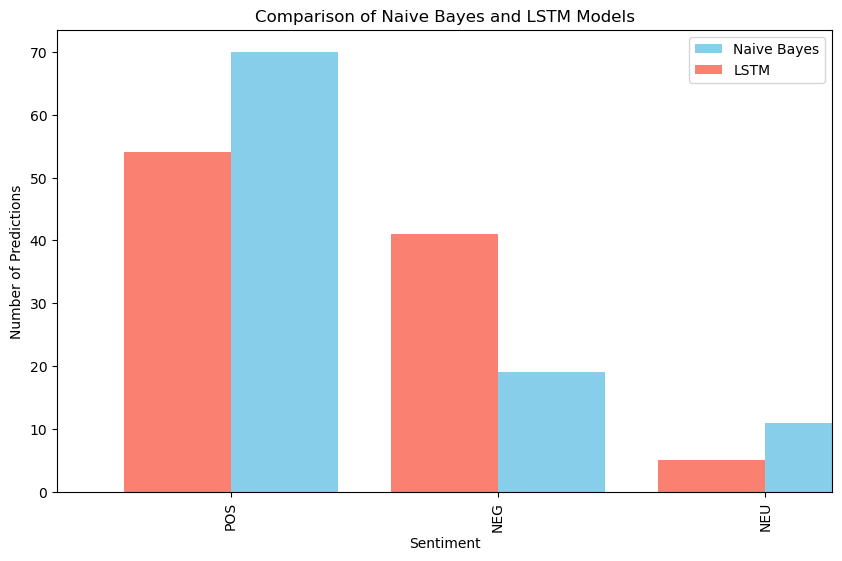

Naive Bayes - Correct Predictions: 34
LSTM - Correct Predictions: 22
Naive Bayes - Accuracy: 0.34
LSTM - Accuracy: 0.22


In [32]:
# test comparison between the two models and create a chart to show the results
import matplotlib.pyplot as plt

# Define a list of sample texts to predict the sentiment
sample_texts = test_df['text'].sample(100, random_state=42).tolist()

# Predict the sentiment of each sample text using the Naive Bayes model
predicted_sentiments_nb = [classify_text_with_scores(text, log_likelihood_positive, log_likelihood_negative, log_likelihood_neutral,
                                                      log_prior_positive, log_prior_negative, log_prior_neutral)[0] for text in sample_texts]

# Predict the sentiment of each sample text using the LSTM model
predicted_sentiments_lstm = [predict_sentiment(text) for text in sample_texts]

# Create a DataFrame to store the sample texts and their predicted sentiments
comparison_df = pd.DataFrame({'text': sample_texts, 'Naive Bayes': predicted_sentiments_nb, 'LSTM': predicted_sentiments_lstm})

# Calculate the number of correct predictions for each model
correct_predictions_nb = (comparison_df['Naive Bayes'] == test_df.loc[comparison_df.index, 'sentiment']).sum()

correct_predictions_lstm = (comparison_df['LSTM'] == test_df.loc[comparison_df.index, 'sentiment']).sum()

# Create a bar chart to compare the number of correct predictions for each model

fig, ax = plt.subplots(figsize=(10, 6))

comparison_df['Naive Bayes'].value_counts().plot(kind='bar', color='skyblue', ax=ax, position=0, width=0.4, label='Naive Bayes')
comparison_df['LSTM'].value_counts().plot(kind='bar', color='salmon', ax=ax, position=1, width=0.4, label='LSTM')

ax.set_title('Comparison of Naive Bayes and LSTM Models')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Predictions')
ax.legend()

plt.show()
# save the chart
fig.savefig('../plot/comparison_chart.png')

# Print the number of correct predictions for each model
print("Naive Bayes - Correct Predictions:", correct_predictions_nb)
print("LSTM - Correct Predictions:", correct_predictions_lstm)

# Print the accuracy of each model
accuracy_nb = correct_predictions_nb / len(comparison_df)
accuracy_lstm = correct_predictions_lstm / len(comparison_df)

print("Naive Bayes - Accuracy:", accuracy_nb)
print("LSTM - Accuracy:", accuracy_lstm)
